# NLP Preprocessing Pipeline & Text Classification Model

This notebook implements an NLP preprocessing pipeline and a text classification model based on the provided requirements.

**🎯 Objective:**
Gain hands-on experience with Natural Language Processing (NLP). Learn how to clean and preprocess text data, transform it into numerical representations, and build a text classification model.

**🛠 Task Description:**
Develop an NLP pipeline that processes raw text into machine-readable features and then trains a classification model (e.g., spam detection, sentiment analysis, or news categorization).

**✅ Functional Requirements:**
1.  **Data Loading:**
    *   Use a text dataset (e.g., IMDB Reviews, SMS Spam Collection, or Kaggle dataset).
    *   Split into training and testing sets.
2.  **Preprocessing Module:**
    *   Convert text to lowercase.
    *   Remove stopwords, punctuation, numbers, and special characters.
    *   Perform tokenization.
    *   Apply stemming or lemmatization.
3.  **Feature Engineering:**
    *   Transform text into numerical features using:
        *   Bag of Words (CountVectorizer) OR
        *   TF-IDF Vectorizer
    *   Optionally try word embeddings (Word2Vec, GloVe, or spaCy).
4.  **Model Training:**
    *   Train at least one classification model (Logistic Regression, Naïve Bayes, SVM).
    *   Optimize hyperparameters with GridSearchCV/RandomizedSearchCV.
5.  **Evaluation:**
    *   Evaluate using Accuracy, Precision, Recall, F1-score.
    *   Generate and display a Confusion Matrix.
    *   Optional: Show word importance (weights) for interpretability.

**💡 Best Practices:**
*   Write modular code: preprocess.py, train.py, evaluate.py.
*   Keep preprocessing reusable for any new dataset.
*   Ensure reproducibility with random seeds.

In [6]:
# Install libraries (first time only)
# !pip install pandas scikit-learn nltk matplotlib seaborn

import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK data (run once)
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## 1. Data Loading

In [7]:
# Load the dataset
# Provide the correct path to your dataset
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

# Define text and label columns
TEXT_COL = "review"   # Make sure this matches the column name in your dataset
LABEL_COL = "sentiment"    # Make sure this matches the column name in your dataset

display(df.head())
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Value counts for label column:\n{df[LABEL_COL].value_counts()}")

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Dataset shape: (50000, 2)
Columns: ['review', 'sentiment']
Value counts for label column:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


## 2. Preprocessing Module

In [8]:
STOPWORDS = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Cleans and preprocesses text data.

    Args:
        text (str): The input text.

    Returns:
        str: The cleaned and preprocessed text.
    """
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)   # Remove URLs
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text) # Remove punctuation
    text = re.sub(r"\d+", " ", text)                     # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()             # Remove extra whitespace

    tokens = text.split()
    tokens = [t for t in tokens if t not in STOPWORDS]    # Remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]    # Lemmatize
    tokens = [t for t in tokens if len(t) > 1]            # Remove single characters

    return " ".join(tokens)

# Apply preprocessing to the text column
df["clean_text"] = df[TEXT_COL].apply(clean_text)

display(df[['review', 'clean_text']].head())

,review,clean_text
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


## 3. Split Data

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df[LABEL_COL], test_size=0.2, random_state=42, stratify=df[LABEL_COL]
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (40000,)
X_test shape: (10000,)
y_train shape: (40000,)
y_test shape: (10000,)


## 4. Feature Engineering (TF-IDF Vectorization)

In [10]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_features=10000)

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

print(f"X_train_vec shape: {X_train_vec.shape}")
print(f"X_test_vec shape: {X_test_vec.shape}")

X_train_vec shape: (40000, 10000)
X_test_vec shape: (10000, 10000)


## 5. Model Training (Logistic Regression)

In [11]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Define hyperparameters for optimization
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'] # 'l1' is not supported with 'saga' solver and l2 is standard for Logistic Regression
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_vec, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.8897249261140033


## 6. Evaluation

✅ Accuracy: 0.8958

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



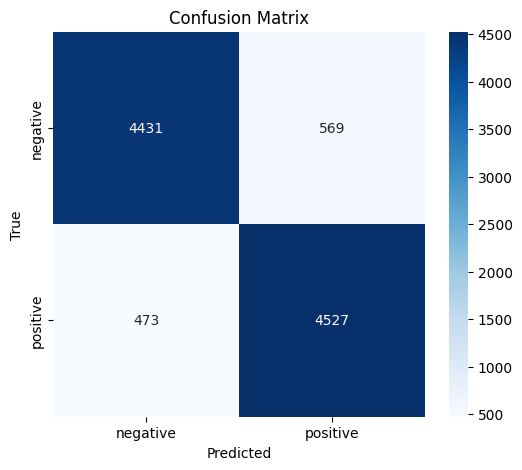

In [12]:
# Predict on the test data
y_pred = best_model.predict(X_test_vec)

# Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Optional: Show Word Importance

In [13]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get coefficients from the best model
coefficients = best_model.coef_[0]

# Create a DataFrame to visualize word importance
word_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort by absolute coefficient value to see most important words
word_importance['abs_coefficient'] = abs(word_importance['coefficient'])
word_importance = word_importance.sort_values(by='abs_coefficient', ascending=False)

print("Top 20 most important words (by absolute coefficient):")
display(word_importance.head(20))

# You can also see words with positive and negative impact separately
print("\nTop 20 words with positive impact:")
display(word_importance[word_importance['coefficient'] > 0].head(20))

print("\nTop 20 words with negative impact:")
display(word_importance[word_importance['coefficient'] < 0].head(20))

Top 20 most important words (by absolute coefficient):


,feature,coefficient,abs_coefficient
9855,worst,-9.337992,9.337992
587,awful,-7.909306,7.909306
617,bad,-7.619026,7.619026
9608,waste,-7.067624,7.067624
3952,great,6.958765,6.958765
2930,excellent,6.775658,6.775658
943,boring,-6.417309,6.417309
6859,poor,-5.880861,5.880861
8876,terrible,-5.739902,5.739902
6665,perfect,5.553278,5.553278



Top 20 words with positive impact:


,feature,coefficient,abs_coefficient
3952,great,6.958765,6.958765
2930,excellent,6.775658,6.775658
6665,perfect,5.553278,5.553278
298,amazing,5.033053,5.033053
9814,wonderful,4.821590,4.821590
4208,hilarious,4.650414,4.650414
5279,loved,4.379710,4.379710
780,best,4.356506,4.356506
1194,brilliant,4.287975,4.287975
3126,favorite,4.202746,4.202746



Top 20 words with negative impact:


,feature,coefficient,abs_coefficient
9855,worst,-9.337992,9.337992
587,awful,-7.909306,7.909306
617,bad,-7.619026,7.619026
9608,waste,-7.067624,7.067624
943,boring,-6.417309,6.417309
6859,poor,-5.880861,5.880861
8876,terrible,-5.739902,5.739902
4297,horrible,-5.177784,5.177784
6227,nothing,-5.161021,5.161021
2551,dull,-5.130568,5.130568
